# Logistic Regression

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing and Analyzing the Data**

In [2]:
data = pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

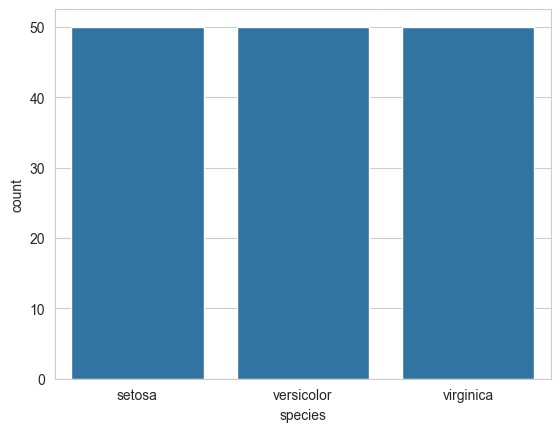

In [6]:
plt.figure(dpi=100)
sns.countplot(data, x="species");

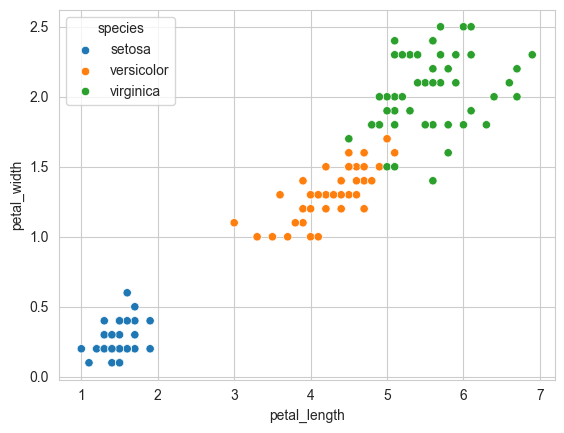

In [7]:
plt.figure(dpi=100)
sns.scatterplot(data, x="petal_length", y="petal_width", hue="species");

<Figure size 640x480 with 0 Axes>

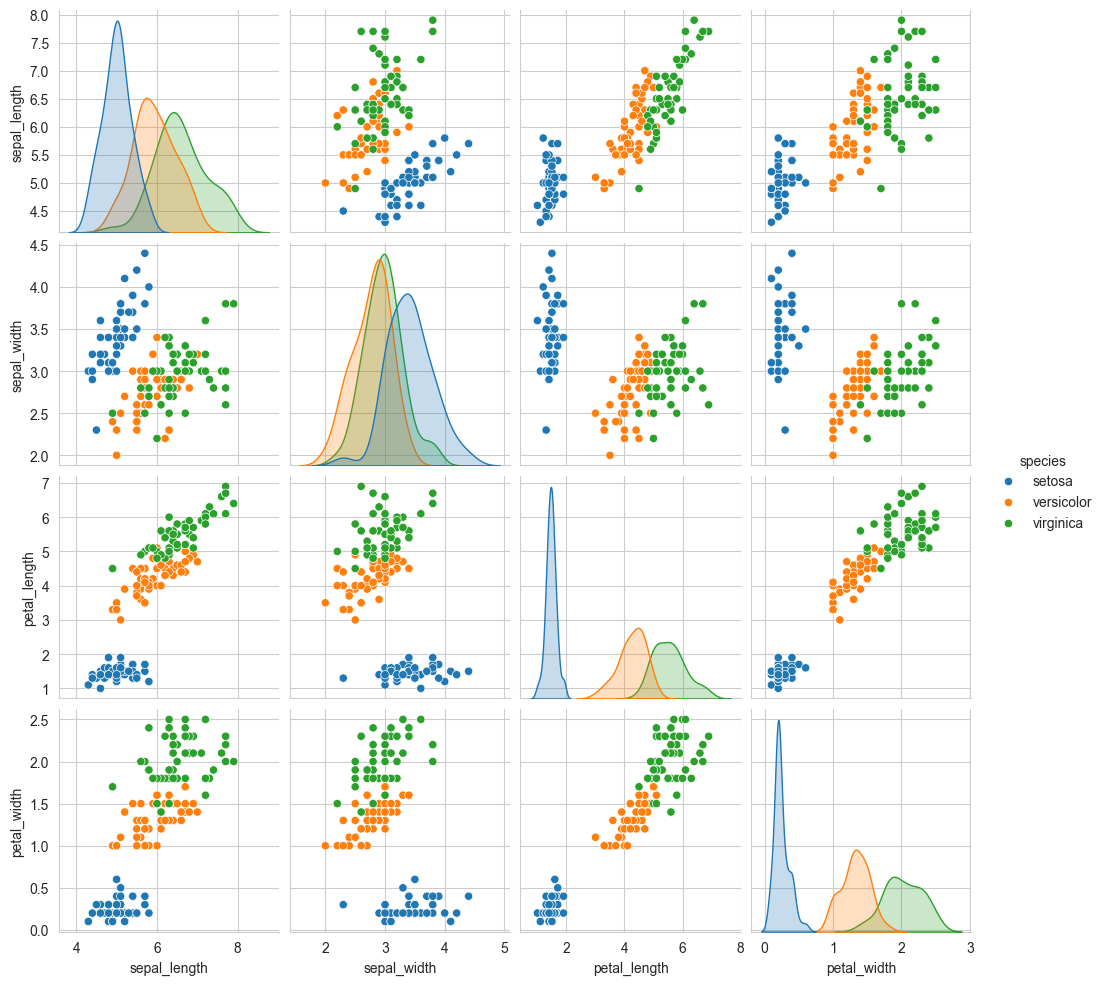

In [8]:
plt.figure(dpi=100)
sns.pairplot(data, hue="species");

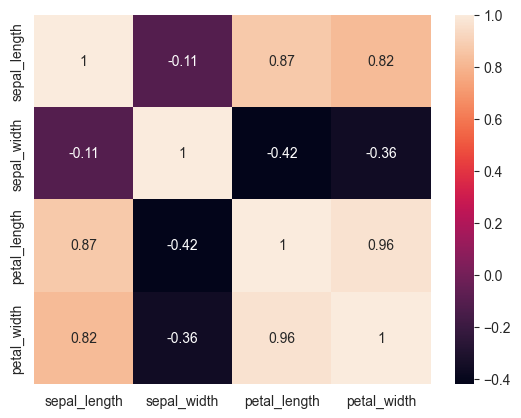

In [9]:
plt.figure(dpi=100)
sns.heatmap(data.corr(numeric_only=True), annot=True);

**Splitting the data into Independent and Dependent Features**

In [10]:
x = data.drop(columns="species", axis=1)
y = data["species"]

**Splitting the Dependent Features into the Training and Testing Data**

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Scaling the Training and Testing Data of Dependent Features**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test);

**Implementing the Logistic Regression with some Hyper Parameters in the Grid Search CV**

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(multi_class="ovr", solver="saga", max_iter=5000)

In [14]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

param_grid = {"penalty": penalty, "C": C}

In [15]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(logistic_model, param_grid, verbose=0)

In [16]:
grid_model.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [17]:
grid_model.best_score_

0.975

In [18]:
grid_model.best_estimator_

LogisticRegression(C=2.7825594022071245, max_iter=5000, multi_class='ovr',
                   penalty='l1', solver='saga')

In [19]:
y_pred = grid_model.predict(x_test)

**Evaluating the model performance on the testing data**

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score -", accuracy_score(y_pred, y_test))
print("Confusion Matrix -\n", confusion_matrix(y_pred, y_test))
print("\nClassification Report -\n", classification_report(y_pred, y_test))

Accuracy Score - 0.9
Confusion Matrix -
 [[10  0  0]
 [ 0 11  2]
 [ 0  1  6]]

Classification Report -
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      0.85      0.88        13
   virginica       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30


**Plotting the ROC Curve**

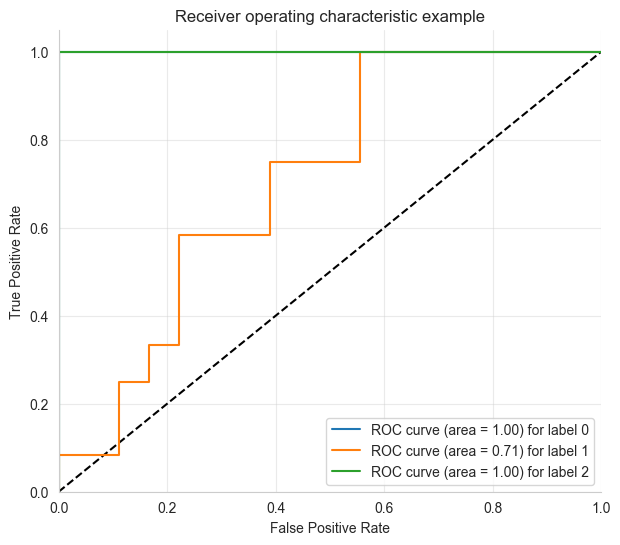

In [21]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(classifier, x_test, y_test, num_classes, figsize=(7, 6)):
    y_score = classifier.decision_function(x_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(num_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(grid_model, x_test, y_test, num_classes=3)